In [2]:
import pickle
# import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import math
# import netCDF4 as nc
import fnmatch
import os
import kuka_utils as u
# from datetime import datetime
# from datetime import timedelta
# import sys
from matplotlib.pyplot import cm
# import cartopy.crs as ccrs
# import cartopy as cartopy




In [3]:
# file_path = '/Volumes/bigLacie/processed_stare/'
file_path = '/Volumes/bigLacie/processed_stare_new_nrcs/'
date_list = ['20191107','20191114','20191220','20191226',
             '20200102','20200107','20200109',
             '20200112','20200116',
             '20200119','20200123','20200124','20200129','20200130']

band = ['Ku', 'Ka']
pols = ['vv','vh','hv','hh']
threshold =  0.0001
vreduc = .8 

#set coords where transects are
areas = u.areas()


date: 20191107
band:  Ku
band:  Ka
date: 20191114
band:  Ku
band:  Ka
date: 20191220
band:  Ku
band:  Ka
date: 20191226
band:  Ku
band:  Ka
date: 20200102
band:  Ku
band:  Ka
date: 20200109
band:  Ku
band:  Ka
date: 20200112
date: 20200116
band:  Ku
band:  Ka
date: 20200119
band:  Ku
band:  Ka
date: 20200123
band:  Ku
band:  Ka
date: 20200124
band:  Ku
band:  Ka
date: 20200130
band:  Ku
band:  Ka
North
South
Runway
Mini
Lead
North
South
Runway
Mini
Lead


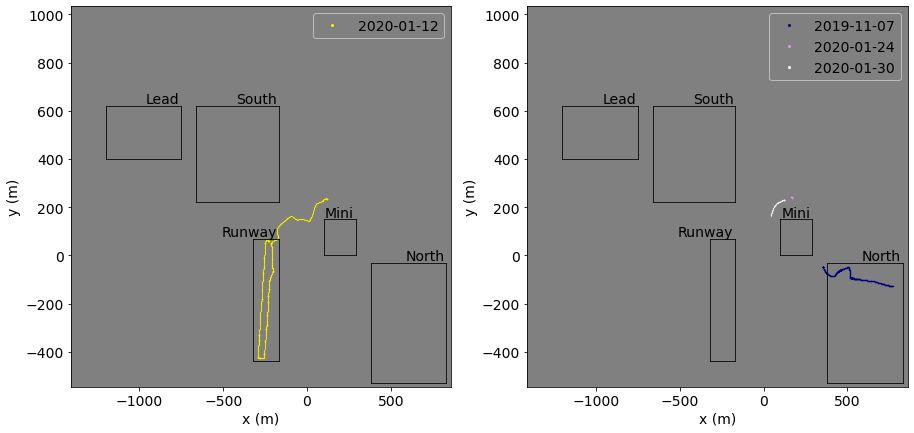

In [22]:
# plot out the KuKa locations 
tol = 5
date_list_plot = ['20191107',
                  '20191114',
                  '20191220',
                  '20191226',
                  '20200102',
                  '20200109',
                  '20200112',
                  '20200116',
                  '20200119',
                  '20200123',
                  '20200124',
                  '20200130']
color=cm.gist_ncar(np.linspace(0,1,len(date_list_plot)))

plt.rcParams['font.size'] = '14'
plt.rcParams['axes.facecolor'] = 'grey'
f, ax = plt.subplots(1,2,figsize = (15,7))
x = []
y = []

for date in date_list_plot:
    print('date:',date)
    summ = {}
    
    if date != '20200112':
    
        for b in ['Ku', 'Ka']:
            print('band: ',b)

    #         if (b != 'Ka') | (date != '20200112'):
            file_list = file_path + '/x_y_p/x_y_p_'+date+'_'+b+'.p'
            x_y_p = pickle.load( open( file_path + '/x_y_p/x_y_p_'+date+'_'+b+'.p', "rb" ) )
            summ[b] = x_y_p
            x.extend(summ[b]['x'])
            y.extend(summ[b]['y'])
    #         else:

        c = color[np.where(np.array(date_list_plot) == date)[0][0]]
        label = date[0:4]+ '-' + date[4:6] + '-' + date[6:8]

        #plot ku where ka absent
        closest, dist = u.find_closest(summ['Ku']['x'], summ['Ku']['y'], summ['Ka']['x'], summ['Ka']['y'])
        match = np.where(dist > tol)[0]
        if len(match) > 0:
            ax[0].plot(np.array(summ['Ku']['x'])[match], np.array(summ['Ku']['y'])[match], '.', markersize = .2,
                 c = c, label = label)

        #plot ka where ku absent
        closest, dist = u.find_closest(summ['Ka']['x'], summ['Ka']['y'], summ['Ku']['x'], summ['Ku']['y'])
        match = np.where(dist > tol)[0]
        if len(match) > 0:
            ax[1].plot(np.array(summ['Ka']['x'])[match], np.array(summ['Ka']['y'])[match], '.', markersize = .2,
                 c = c, label = label)
    else:
        x_y_p = pickle.load( open( file_path + '/x_y_p/x_y_p_'+date+'_'+'Ku'+'.p', "rb" ) )
        c = color[np.where(np.array(date_list_plot) == date)[0][0]]
        label = date[0:4]+ '-' + date[4:6] + '-' + date[6:8]
        ax[0].plot(x_y_p['x'], x_y_p['y'], '.', markersize = .2,
                 c = c, label = label)
        x.extend(x_y_p['x'])
        y.extend(x_y_p['y'])
        
offset = 30
xlim = min(x)-30, max(x)+50
ylim = min(y)-30, max(y)+10

acol = 'k'
awidth = .8

for i in [0, 1]:
    ax[i].set_xlim(xlim)
    ax[i].set_ylim(ylim)
    ax[i].set_xlabel('x (m)')
    ax[i].set_ylabel('y (m)')

    for key in areas:
        print(key)
        ax[i].plot(areas[key]['x'][0:2], [areas[key]['y'][0],areas[key]['y'][0]], color = acol, linewidth = awidth)
        ax[i].plot(areas[key]['x'][0:2], [areas[key]['y'][1],areas[key]['y'][1]] , color = acol, linewidth = awidth)
        ax[i].plot([areas[key]['x'][0],areas[key]['x'][0]], areas[key]['y'][0:2] , color = acol, linewidth = awidth)
        ax[i].plot([areas[key]['x'][1],areas[key]['x'][1]], areas[key]['y'][0:2] , color = acol, linewidth = awidth)
        ax[i].text(areas[key]['x'][1]-10, areas[key]['y'][1]+10, key, ha = 'right')

lgd0 = ax[0].legend(markerscale = 20, facecolor = 'grey')
lgd1 = ax[1].legend(markerscale = 20, facecolor = 'grey')

plt.savefig('/Users/rosie/Documents/papers/mac_rosie_mosaic/kuka_map_missing.jpg',
            bbox_extra_artists=(lgd0, lgd1), 
            bbox_inches='tight', 
            dpi = 300) 

plt.show()

